In [18]:
import pandas as pd

In [19]:
# Label of activity:
# 1: sit on bed, 2: sit on chair, 3: lying, 4: ambulating

# We will focus on 2 variables for now
df = pd.read_csv(
    "datasets/activity.csv",
    usecols=["acc_vertical", "activity"],
)
df["lying_down"] = (df.activity == 3).astype(int)
df = df.drop(columns=["activity"])
df.describe()

,acc_vertical,lying_down
count,497.000000,497.000000
mean,0.410058,0.603622
std,0.394741,0.489638
min,-0.140090,0.000000
25%,0.078086,0.000000
50%,0.158470,1.000000
75%,0.870420,1.000000
max,1.249400,1.000000


In [20]:
df.head()

,acc_vertical,lying_down
0,1.24940,0
1,1.24940,0
2,0.97377,0
3,0.97377,0
4,0.97377,0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [22]:
# Prepare data
x = df[["acc_vertical"]]
y = df[["lying_down"]]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [23]:
classifier = LogisticRegression().fit(x_train, y_train.values.ravel())
classifier.coef_

array([[-7.19831894]])

In [24]:
classifier.intercept_

array([3.93088943])

c:\venvs\pytorch-2.0\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
c:\venvs\pytorch-2.0\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\venvs\pytorch-2.0\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\venvs\pytorch-2.0\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\venvs\pytorch-2.0\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1257: PerfectSeparationWa

<Axes: xlabel='acc_vertical', ylabel='lying_down'>

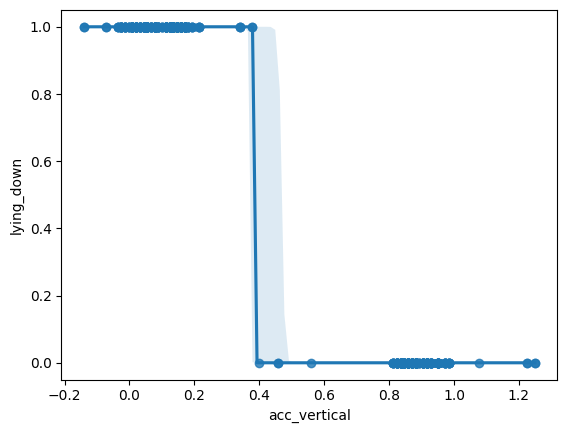

In [25]:
import seaborn as sns

sns.regplot(x="acc_vertical", y="lying_down", data=df, logistic=True)

In [26]:
y_pred = classifier.predict(x_test)

In [27]:
y_pred.mean()

0.5066666666666667

In [38]:
classifier.predict_proba(x_test)

array([[0.34501109, 0.65498891],
       [0.93495154, 0.06504846],
       [0.03604963, 0.96395037],
       [0.0494764 , 0.9505236 ],
       [0.06253019, 0.93746981],
       [0.05351057, 0.94648943],
       [0.8896027 , 0.1103973 ],
       [0.8896027 , 0.1103973 ],
       [0.04225776, 0.95774224],
       [0.87229624, 0.12770376],
       [0.91170809, 0.08829191],
       [0.03328485, 0.96671515],
       [0.0283567 , 0.9716433 ],
       [0.06755309, 0.93244691],
       [0.91170809, 0.08829191],
       [0.05351057, 0.94648943],
       [0.03604963, 0.96395037],
       [0.93495154, 0.06504846],
       [0.89746758, 0.10253242],
       [0.94850216, 0.05149784],
       [0.88122191, 0.11877809],
       [0.95600207, 0.04399793],
       [0.94850216, 0.05149784],
       [0.93495154, 0.06504846],
       [0.91814305, 0.08185695],
       [0.88122191, 0.11877809],
       [0.02616591, 0.97383409],
       [0.06253019, 0.93746981],
       [0.9593527 , 0.0406473 ],
       [0.90482589, 0.09517411],
       [0.

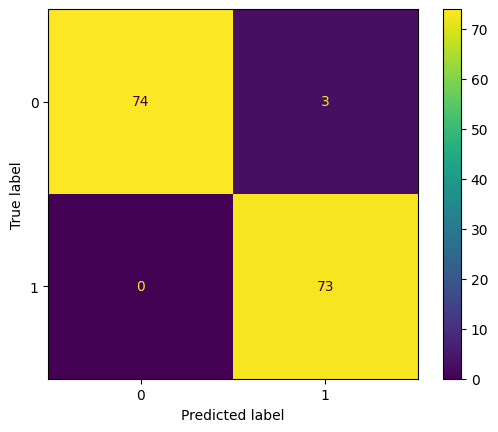

In [42]:
import sklearn.metrics as metrics

cm = metrics.confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=classifier.classes_
)
disp.plot()

In [47]:
import sklearn.metrics as metrics

precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"Accuracy = {accuracy}")
print(f"AUC = {auc}")

Precision = 0.9605263157894737
Recall = 1.0
Accuracy = 0.98
AUC = 0.9805194805194805


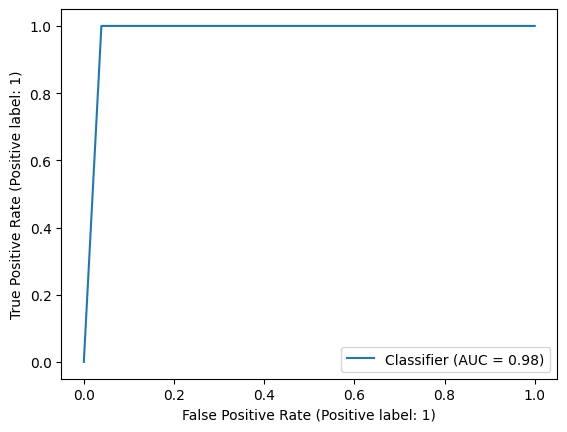

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred)

# plt.show()